In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, date

# QNO:41 Find the age prone to get stroke.

In [17]:
#Load Patients from excel sheet
Patient_data = pd.read_excel('HospitalDatabase.xlsx','Patients')

#Load ReadmissionRegistry from excel sheet
ReadmissionRegistry_data = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')

#merge the two dataframes
merged_data=pd.merge(Patient_data,ReadmissionRegistry_data, on='PatientID' )

#compute age of each patient in merged dataframe
merged_data['Age']=(pd.Timestamp.now()-pd.to_datetime(merged_data['DateOfBirth'])).astype('<m8[Y]')

stroke_data=merged_data[merged_data['PrimaryDiagnosis']=='Stroke']


average_age=stroke_data['Age'].mean()
print("Average age prone to get Stroke is: ")
print (average_age)

Average age prone to get Stroke is: 
49.85294117647059


# QNO:42 Calculate mortality by diagnosis.

In [12]:
#Load ReadmissionRegistry from excel sheet
ReadmissionRegistry_data = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')


pivot_table=pd.pivot_table(ReadmissionRegistry_data,index='PrimaryDiagnosis', columns='DischargeDisposition',values='PatientID',aggfunc='count',fill_value=0)
pivot_table['Moratlity']=pivot_table['Expired']/(pivot_table['Expired']+pivot_table['Home']+pivot_table['Transfer'])

pivot_table

DischargeDisposition,Expired,Home,Transfer,Moratlity
PrimaryDiagnosis,,,,
AMI,6,42,0,0.125000
Afib,4,6,1,0.363636
Broken Leg,3,6,0,0.333333
Diabetes,9,48,7,0.140625
Fever,4,15,0,0.210526
Flu,11,67,2,0.137500
Heart Failure,16,53,9,0.205128
Hip Fracture,3,20,0,0.130435
Hypertension,16,34,0,0.320000


# QNO:43 Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [11]:
#QNO:43 Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.
hospital_data = pd.read_excel('HospitalDatabase.xlsx','Patients')

Patients= hospital_data[hospital_data['FirstName'].str.contains('lau',case=False) | hospital_data['LastName'].str.contains('lau',case=False)]
Patients

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


# QNO:44 Display data by splitting age in 4 quartiles and labeling the quartiles.


In [10]:
#Load Patients from excel sheet
Patient_data = pd.read_excel('HospitalDatabase.xlsx','Patients')

#get age from dateofbirth column
Patient_data['DateOfBirth'] = pd.to_datetime(Patient_data['DateOfBirth'])
Patient_data['Year'] = Patient_data['DateOfBirth'].dt.year
Patient_data['Age'] = 2023 - Patient_data['Year']

#Split the age column into Quartiles
Patient_data['Age_Quartiles']=pd.qcut(Patient_data['Age'],q=4,labels=['Quartile1','Quartile2','Quartile3','Quartile 4'])

Patient_data



,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Year,Age,Age_Quartiles
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960,63,Quartile 4
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985,38,Quartile1
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976,47,Quartile2
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968,55,Quartile3
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962,61,Quartile 4
...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986,37,Quartile1
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970,53,Quartile3
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983,40,Quartile1
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963,60,Quartile 4


# QNO:45 Usage of Enumeration in Python with any example.


In [21]:
Fruits= ('apple', 'banana', 'cherry')

for index,fruit in enumerate(Fruits):
    print(f"Index {index}:{fruit}")

Index 0:apple
Index 1:banana
Index 2:cherry


# QNO:46 Count of canceled status.


In [22]:
# QNO:46 Count of canceled status.

hospital_data = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')
CanceledCount=len(hospital_data[hospital_data['VisitStatus']=='Canceled'])
print("Number of canceled status count is :", CanceledCount)

Number of canceled status count is : 60


# QNO:47 Display the patient details with maximum pulse pressure.

In [13]:
hospital_data = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')
hospital_data1 = pd.read_excel('HospitalDatabase.xlsx','Patients')
Merge_data=pd.merge(hospital_data1,hospital_data,left_on='PatientID',right_on='PatientMRN')

#find max pulse
Max_pulse= Merge_data['Pulse'].max()

#filter data to get only max Pulse patient details
Max_Pulse_patients=Merge_data[Merge_data['Pulse']==Max_pulse]

#Display Columns
Display_Columns=['PatientID','FirstName','LastName','Gender','VisitType','Pulse']

#print patients with Max Pulse
Max_Pulse_patients[Display_Columns]


,PatientID,FirstName,LastName,Gender,VisitType,Pulse
471,812,Daniel,Group,Male,Follow Up,99.986463


# QNO: 48 Create a heat map to show the correlation between the column values of Edvisits.


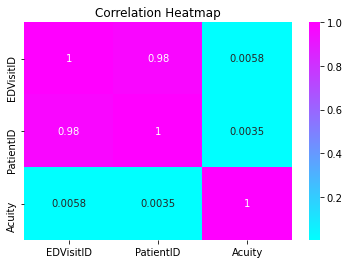

In [26]:
EDVisits_data = pd.read_excel('HospitalDatabase.xlsx','EDVisits')

Correlation=EDVisits_data.corr()

sns.heatmap(Correlation,annot=True,cmap='cool')
plt.title('Correlation Heatmap')
plt.show()


# QNO: 49 Plot a graph by counting the no. of patients in each department.


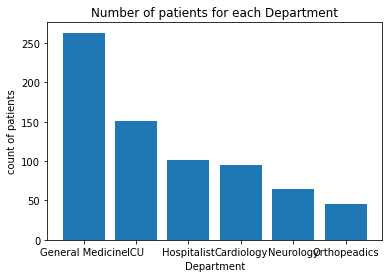

In [30]:
Discharges_data = pd.read_excel('HospitalDatabase.xlsx','Discharges')

Department_count=Discharges_data['Service'].value_counts()
plt.bar(Department_count.index,Department_count.values)
plt.xlabel('Department')
plt.ylabel('count of patients')
plt.title('Number of patients for each Department')
plt.show()


# QNO:50 Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [14]:
# QNO:50 Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

hospital_data = pd.read_excel('HospitalDatabase.xlsx','EDVisits')
hospital_data1 = pd.read_excel('HospitalDatabase.xlsx','Patients')

Merge_data=pd.merge(hospital_data1,hospital_data,on='PatientID')

Patients_Details= Merge_data[(Merge_data['ReasonForVisit'].isin(['Migraine','Pneumonia']))& (Merge_data['Acuity']>=2)]
Patients_Details

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,EDVisitID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
4,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,55,2020-01-01 15:01:29.846,2020-01-01 23:11:53.864,3,Migraine,Admitted
18,7,Skipton,Bar,1975-11-25 22:23:53.525,Male,White,English,98,2020-01-02 01:33:47.283,2020-01-02 11:36:20.129,2,Migraine,Discharged
20,8,Alexandra,Green,1967-06-16 16:37:21.694,Male,White,English,8,2020-01-01 01:15:35.564,2020-01-02 00:07:24.636,2,Migraine,Discharged
24,10,Granny,Man,1969-09-15 11:20:42.218,Male,White,English,10,2020-01-01 02:02:03.160,2020-01-01 08:28:27.128,2,Migraine,Discharged
27,12,Zonnya,Ab,1963-05-23 10:04:33.074,Male,White,Spanish,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,913,Alta,McGrath,1973-02-09 04:11:58.220,Female,Black/African-American,English,1167,2020-01-15 05:09:22.987,2020-01-16 03:57:13.244,4,Pneumonia,Admitted
1168,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Female,Black/African-American,English,1169,2020-01-15 05:30:02.889,2020-01-15 18:47:12.044,3,Migraine,Admitted
1169,916,Kaylil,Baldack,1966-11-17 14:10:35.224,Female,Black/African-American,English,1170,2020-01-15 05:57:29.834,2020-01-15 06:03:50.631,4,Pneumonia,Admitted
1170,917,Velvet,Bushnell,1965-11-13 07:26:58.889,Female,Black/African-American,English,1171,2020-01-15 06:27:24.353,2020-01-15 10:16:03.795,2,Pneumonia,Admitted


# QNO:51 Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit. 

In [11]:
hospital_data = pd.read_excel('HospitalDatabase.xlsx','EDVisits')

#user Input
Reason_for_visit=input("Enter Reason for visit ")

#number of patients admitted with that reason

Patients_count=len(hospital_data[hospital_data['ReasonForVisit']==Reason_for_visit])
print(f"Number of patients admitted with '{Reason_for_visit}' are {Patients_count}")


Enter Reason for visit Migraine
Number of patients admitted with 'Migraine' are 156


# QNO:52 Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.


In [15]:
#load Ambulatory dataset from HospitalDatabase 
hospital_data = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')

#finding the index of row with maximum BloodPressureSystolic 

Max_SBP_Index=hospital_data['BloodPressureSystolic'].idxmax()

#using loc to retrieve the row with index found above

Max_SBP=hospital_data.loc[Max_SBP_Index]

print("Row with maximum BloodPressureSystolic.")
Max_SBP



Row with maximum BloodPressureSystolic.


VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                            190
BloodPressureDiastolic                       143.989
Pulse                                        74.9769
VisitStatus                                Completed
Name: 236, dtype: object

# QNO:53 Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).


# QNO :54 Retrieve the row with minimum DBP using sorting technique.



In [16]:
#load Ambulatory dataset from HospitalDatabase 
hospital_data = pd.read_excel('HospitalDatabase.xlsx','AmbulatoryVisits')

#Sort dataset by the  BloodPressureDiastolic in ascending order
datasorted=hospital_data.sort_values('BloodPressureDiastolic')

#retreive first row from the datasorted
MinimumDBP=datasorted.iloc[0]

print("Row with minimum DBP ")
MinimumDBP




Row with minimum DBP 


VisitID                                          163
PatientMRN                                       801
ProviderID                                        11
DateofVisit                      2019-02-08 00:00:00
DateScheduled             2019-02-07 23:41:12.181000
VisitDepartmentID                                  7
VisitType                                  Follow Up
BloodPressureSystolic                            120
BloodPressureDiastolic                       51.6957
Pulse                                        53.3105
VisitStatus                                Completed
Name: 757, dtype: object

# QNO:55 Replace all the null values in ReadmissionFlag with 0.


In [32]:
Readmission_Data = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')

Readmission_Data['ReadmissionFlag'].fillna(0, inplace=True)

Readmission_Data


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


# QNO: 56 Get the list of patient ID's which are not there in ReadmissionRegistry.

In [18]:
#Load Patient and readmissionregistary form excel sheet
hospital_data = pd.read_excel('HospitalDatabase.xlsx','Patients')
Readmission_Data = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')

#get list of patient id's not in readmission registry 

PatientsNotIn_Readmission=hospital_data[~hospital_data['PatientID'].isin(Readmission_Data['PatientID'])]['PatientID'].tolist()

#print the list of patients
print ("Patient id's not in readmissonregistry:")
print(PatientsNotIn_Readmission)

Patient id's not in readmissonregistry:
[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 8

# QNO:57 Find reasonForVisit with highest count of acuity 5 patients.


In [37]:
EDVisits_data = pd.read_excel('HospitalDatabase.xlsx','EDVisits')

Acuity_value=EDVisits_data[EDVisits_data['Acuity']==5]

count=Acuity_value['ReasonForVisit'].value_counts()

highest_count=count.idxmax()
print ('Reason for vist with highestcount of acuity 5 is:')
print(highest_count)

Reason for vist with highestcount of acuity 5 is:
Chest Pain


#  QNO:58 Display full name of patients who are born in 1986.

In [31]:

#Load Patients from excel sheet
hospital_data = pd.read_excel('HospitalDatabase.xlsx','Patients')

for index, row in hospital_data.iterrows():
    dob_str=row['DateOfBirth'].strftime('%m/%d/%Y')
    dtt=dt.strptime(dob_str,'%m/%d/%Y')
    if dtt.year==1986:
        print(row['FirstName'] + ' ' +row['LastName'])



Gabriel  Joseph
Lincoln  Brenda
Ala Halpert
Lolita Darci
Fadel Bernardt
Bentley Kippax
Vale Olanda
Britt Dureden
Cristabel Chatel
Constantia Group
Morgan Scrowston
Dom Baglow
Ignazio Melling
Homenick Rings
Hashim Slark
Ellie Ramsbotham
Llewellyn Group
Niles Shaw
Yvette Inc
Siouxie Group
Carly Group
Worth Pickering
Arni Baldack
Kuvalis Coupland
Rebbecca Rollingson
Wat Fideler
